With the already cleaned data from our previous steps I will now start analyzing the data to answer some questions.

A challenge here is that sales are not as clear since there are different types of sales.

Due to the nature of the data we have to define the different kinds of sales we need for the analysis.

I first need to define:
Define what a sale is: Any order that ended with a work order number. An order that was "pushed through" in the system.
    This means that an order was processed but does not necessarily mean that it will get installed. 
    
Define what an installed sale is: Installed sale is a sale that got installed within a week. 
In our dataset we have the column process status showing when this got either approved, cancelled, failed, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np

In [3]:
data = pd.read_csv(r'C:\Users\Fernando\pyproj\my_env\cleaned_ascent5sales.csv')

print(data.head(5))
print(data.columns)

      Status        ID    Office       Agent Name   Agent ID Sales Date  \
0  Installed  760479.0  Ascent 5  Alexandra Jones  CRE818485  10/2/2023   
1       Paid  760491.0  Ascent 5    Edith Herrera  CRE193806  10/2/2023   
2  Installed  760558.0  Ascent 5     Jesus Garcia  CRE284747  10/2/2023   
3  Cancelled  760611.0  Ascent 5  Mackenzie Perry  CRE281395  10/2/2023   
4       Paid  760649.0  Ascent 5  Mackenzie Perry  CRE281395  10/2/2023   

   Work Order Number    Account Number  Mobile Order Number  \
0       1.000280e+15                 0                  NaN   
1       1.000280e+15  8260132088776512                  NaN   
2       1.000280e+15                 0                  NaN   
3       1.000280e+15                 0                  NaN   
4       1.000280e+15  8260130596981392                  NaN   

                  Name  ...       Installation Type Installation Date  \
0       Justin Compton  ...  Self Install Kit (SIK)   10/3/2023 16:30   
1         Raul Napoles  

In [4]:
#Defining a sale
# Filtering the dataset to include only rows where 'Agent Name', 'Work Order Number', and 'Package' are not null
# This is because any row that contains data for Agent Name, Work Order and Package is a valid order that was executed, a "sale"
# I am not including status yet because with that column I will check if the sales got installed, cancelled, etc
sales_data = data.dropna(subset=['Agent Name', 'Work Order Number', 'Package'])

# This new DataFrame 'sales_data' now contains only the rows that qualify as a "sale"
# Counting the number of sales per agent and sorting them to answer who are the best performing agents
sales_per_agent = sales_data.groupby('Agent Name').size()
sales_per_agent_sorted = sales_per_agent.sort_values()
print(sales_per_agent_sorted)

Agent Name
Adin Cole Ward               1
Robert Maston                1
Lorenzo Ianicelli            1
Eric Ngo                     1
Eric Herrera                 1
Charmaine Thomas             1
Brandon Roberts              1
Gavin Brown                  1
Collin Landry                2
Brandon Barial               2
Rogelio Diaz                 2
Ashley Smith                 2
Zalen Long                   4
Bianca Salazar               4
Joseph Sparks                4
Alex Thurber                 4
Nichole Earls                6
Erick Estrada                7
Teyshan Deangelis            7
Luiz Abrisqueta Algardh      7
Lydia Kroenecke              8
Denise Awoyemi              11
Francisco Amaya Martell     11
Augustus Papaceno           30
Isaiah Warren               39
Stefany Gonzalez            44
Luz Macias                  88
Alexandra Jones             91
Junior Limon               137
Juan Munoz                 151
Mackenzie Perry            165
Tyshanique Ramsey          1

#####################################
# Visualizing total sales by agents #
#####################################

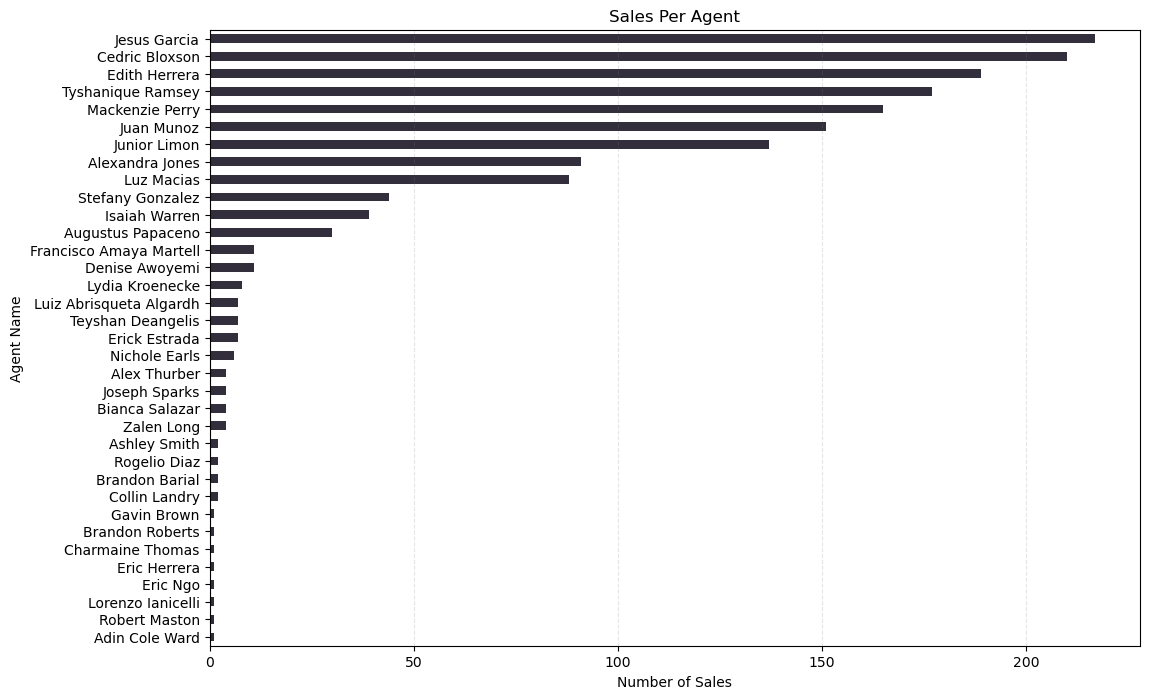

In [5]:
plt.figure(figsize=(12, 8))
ax = sales_per_agent_sorted.plot(kind='barh', color='#332E3C')
plt.title('Sales Per Agent')
plt.xlabel('Number of Sales')
plt.ylabel('Agent Name')
ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.2)
plt.show()

Now knowing the number of sales each agent did we need to know how many of those sales were actually installed
The company gets paid on installed sales of course so that is the real number that matters
This will also help us later to check the installation rate for each agent and the office overall

For that this is how I am defining an installed sale

In [11]:
# Filtering the dataset to include only rows where 'Agent Name', 'Work Order Number', 'Package' are not null AND 'Status' is 'Installed'

installed_sales_data = data.dropna(subset=['Agent Name', 'Work Order Number', 'Package'])
installed_sales_data = installed_sales_data[installed_sales_data['Process Status'].str.contains('APPR on', na=False)]

# This new DataFrame 'installed_sales_data' now contains only the rows that qualify as an "installed sale"
# Grouping by 'Agent Name' and count the number of installed sales for each agent
installed_sales_per_agent = installed_sales_data.groupby('Agent Name').size()

# Optionally, sort the results to see the agents with the most installed sales
installed_sales_per_agent_sorted = installed_sales_per_agent.sort_values()

# Displaying the sorted results
print(installed_sales_per_agent_sorted)


Agent Name
Adin Cole Ward               1
Alex Thurber                 1
Ashley Smith                 1
Bianca Salazar               1
Brandon Barial               1
Luiz Abrisqueta Algardh      1
Charmaine Thomas             1
Eric Ngo                     1
Eric Herrera                 1
Rogelio Diaz                 2
Lydia Kroenecke              2
Zalen Long                   2
Collin Landry                2
Teyshan Deangelis            3
Erick Estrada                4
Nichole Earls                4
Joseph Sparks                4
Denise Awoyemi               5
Francisco Amaya Martell      5
Augustus Papaceno           10
Isaiah Warren               11
Stefany Gonzalez            16
Cedric Bloxson              22
Luz Macias                  37
Edith Herrera               39
Alexandra Jones             40
Tyshanique Ramsey           59
Juan Munoz                  67
Mackenzie Perry             74
Junior Limon                80
Jesus Garcia               112
dtype: int64


###############################################
Visualizing it - total installed sales by agent
###############################################

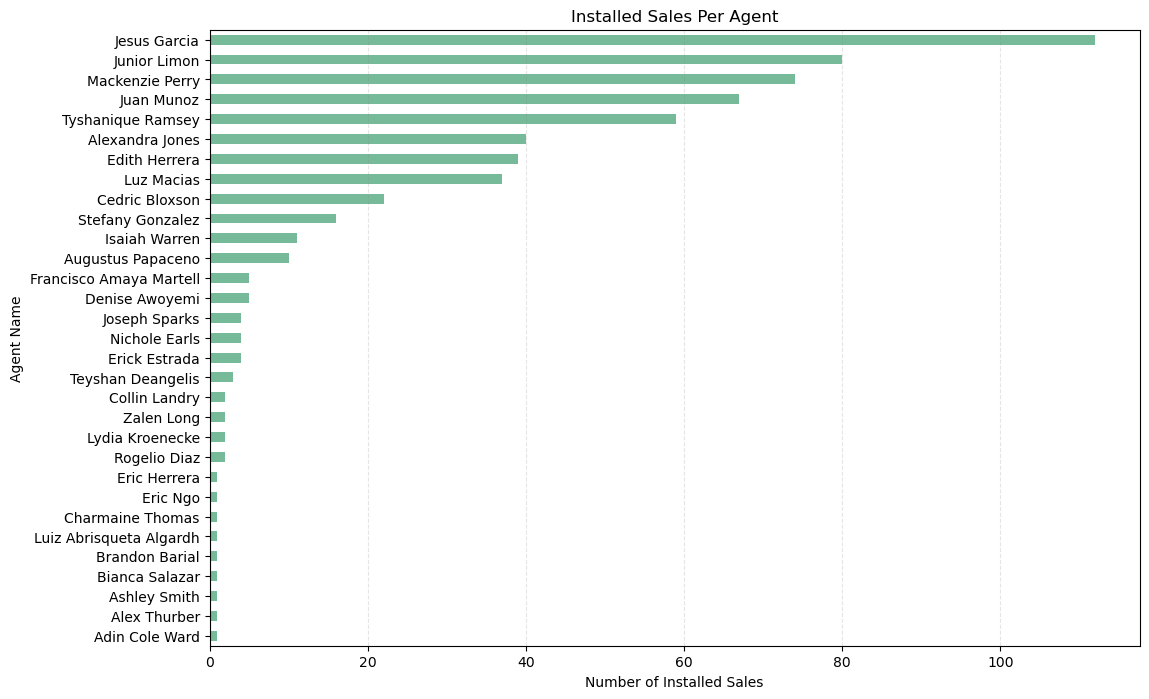

In [12]:
plt.figure(figsize=(12, 8))
ax = installed_sales_per_agent_sorted.plot(kind='barh', color='#77BA99')
plt.title('Installed Sales Per Agent')
plt.ylabel('Agent Name')
plt.xlabel('Number of Installed Sales')
ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.2)
plt.show()

####################################
COMPARING SALES AND INSTALLED SALES
####################################

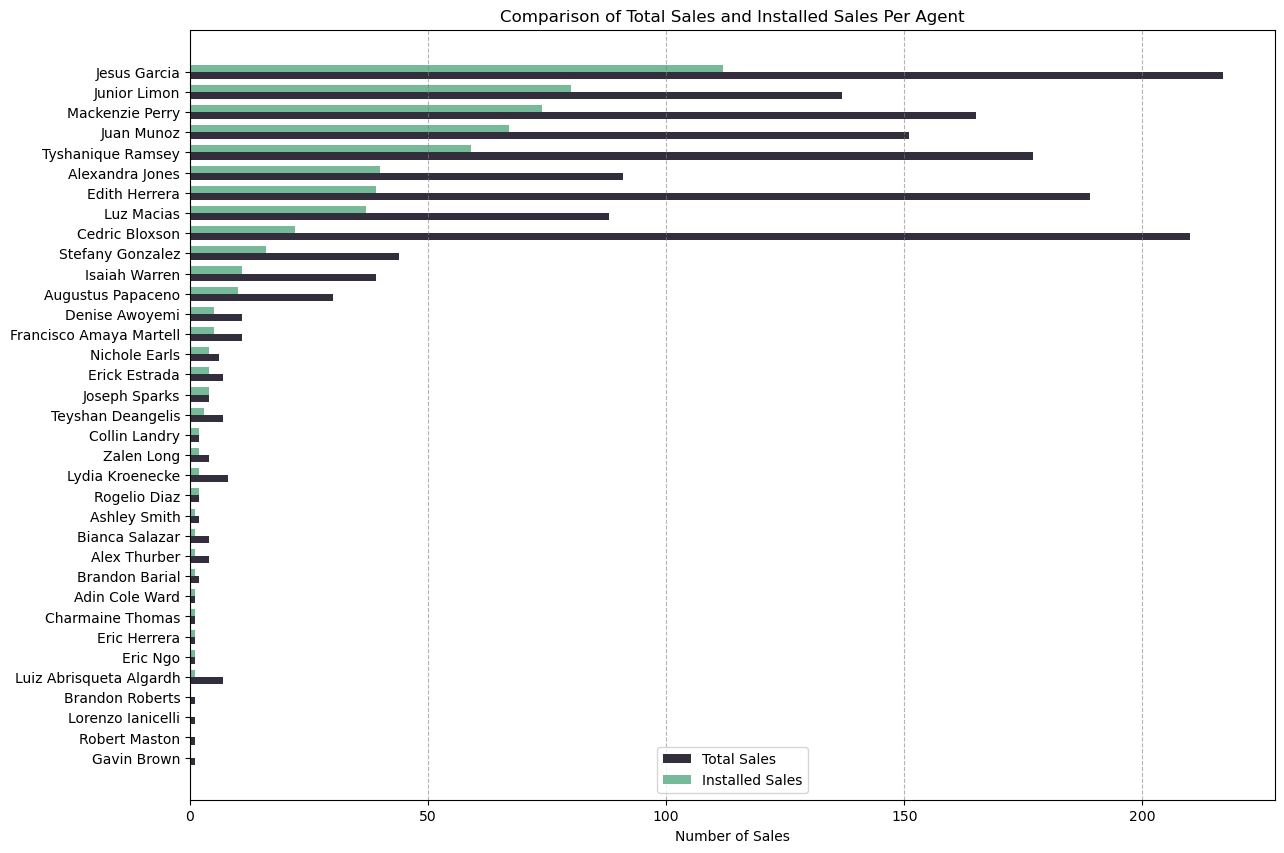

In [14]:
# Ensuring both series have the same index in the same order
all_agents = sales_per_agent_sorted.index.union(installed_sales_per_agent_sorted.index)
total_sales = sales_per_agent_sorted.reindex(all_agents, fill_value=0)
installed_sales = installed_sales_per_agent_sorted.reindex(all_agents, fill_value=0)

# Sorting the indices by installed sales in ascending order
sorted_indices = installed_sales.sort_values().index
total_sales_sorted = total_sales.reindex(sorted_indices)
installed_sales_sorted = installed_sales.reindex(sorted_indices)

# Setting up the plot
fig, ax = plt.subplots(figsize=(14, 10))
bar_width = 0.35
index = np.arange(len(sorted_indices))

# Plotting both sets of data
bars1 = ax.barh(index, total_sales_sorted, bar_width, label='Total Sales', color='#332E3C')
bars2 = ax.barh(index + bar_width, installed_sales_sorted, bar_width, label='Installed Sales', color='#77BA99')
ax.set_title('Comparison of Total Sales and Installed Sales Per Agent')
ax.set_xlabel('Number of Sales')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(sorted_indices)
ax.legend(loc='lower center')

# Turn on the grid for the x-axis only
ax.xaxis.grid(True, linestyle='--', alpha=0.6, color='grey')
# Show the plot
plt.show()

###############################
# INSTALLATION RATE PER AGENT #
###############################

Agent Name
Junior Limon               58.394161
Jesus Garcia               51.612903
Denise Awoyemi             45.454545
Francisco Amaya Martell    45.454545
Mackenzie Perry            44.848485
Juan Munoz                 44.370861
Alexandra Jones            43.956044
Luz Macias                 42.045455
Stefany Gonzalez           36.363636
Augustus Papaceno          33.333333
Tyshanique Ramsey          33.333333
Isaiah Warren              28.205128
Lydia Kroenecke            25.000000
Edith Herrera              20.634921
Cedric Bloxson             10.476190
dtype: float64


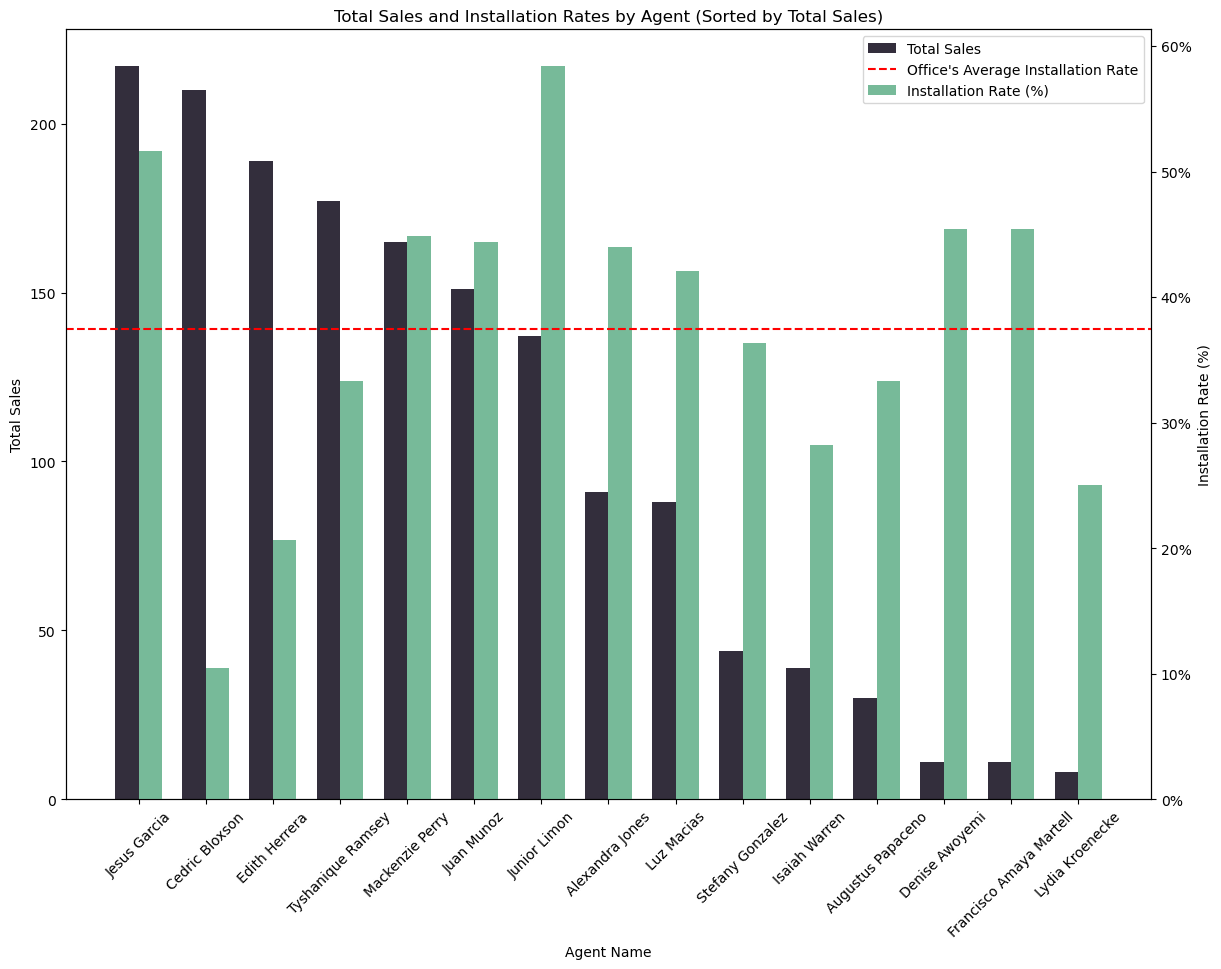

In [16]:
# Filtering out agents with less than 8 sales - 
# since that is the minimum sales expected from a new employee according to the client for them to stay employed (after 4 weeks)
valid_agents = sales_per_agent[sales_per_agent >= 8]

# Reindexing installed sales to include only valid agents and fill missing values with zero
installed_sales_filtered = installed_sales_per_agent.reindex(valid_agents.index, fill_value=0)

# Calculating the installation rate for valid agents
installation_rate_per_agent = (installed_sales_filtered / valid_agents * 100)
installation_rate_per_agent_sorted = installation_rate_per_agent.sort_values(ascending=False)

# Display the sorted installation rates
print(installation_rate_per_agent_sorted)


# Calculating the total installed sales and total sales across all agents
total_installed_sales = installed_sales_per_agent_sorted.sum()
total_sales = sales_per_agent_sorted.sum()

# Calculating the overall installation rate as a percentage
overall_installation_rate = (total_installed_sales / total_sales) * 100

# Sort 'valid_agents' by total sales in descending order
sorted_indices = valid_agents.sort_values(ascending=False).index

# Reindexing the installation rate data to match the sorted order of agents
installation_rate_sorted = installation_rate_per_agent_sorted.reindex(sorted_indices)
total_sales_sorted = valid_agents.reindex(sorted_indices)

# Setting up the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 10))

# Define the bar width and positions
bar_width = 0.35
index = np.arange(len(sorted_indices))

# Bar chart for total sales
bars1 = ax1.bar(index, total_sales_sorted, bar_width, label='Total Sales', color='#332E3C')
ax1.set_xlabel('Agent Name')
ax1.set_ylabel('Total Sales', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(sorted_indices, rotation=45)

# Creating a secondary axis for installation rates
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width, installation_rate_sorted, bar_width, label='Installation Rate (%)', color='#77BA99')
ax2.set_ylabel('Installation Rate (%)', color='black')
ax2.tick_params(axis='y', labelcolor='Black')

# Formatting the y-axis to show percentages
formatter = FuncFormatter(lambda y, _: f'{int(y)}%')
ax2.yaxis.set_major_formatter(formatter)

ax2.tick_params(axis='y')

# Adding a reference line for the overall installation rate
ax2.axhline(y=overall_installation_rate, color='red', linestyle='--', label='Office\'s Average Installation Rate')

# Adding legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Total Sales and Installation Rates by Agent (Sorted by Total Sales)')
plt.show()

##############################################
# Sales in the office throughout the quarter #
##############################################

   Sales Date  Sales Count Week Start Date
0  2023-10-08          112      2023-10-02
1  2023-10-15          102      2023-10-09
2  2023-10-22           95      2023-10-16
3  2023-10-29          117      2023-10-23
4  2023-11-05          131      2023-10-30
5  2023-11-12          157      2023-11-06
6  2023-11-19          141      2023-11-13
7  2023-11-26          210      2023-11-20
8  2023-12-03          124      2023-11-27
9  2023-12-10          144      2023-12-04
10 2023-12-17          141      2023-12-11
11 2023-12-24           73      2023-12-18
12 2023-12-31           82      2023-12-25


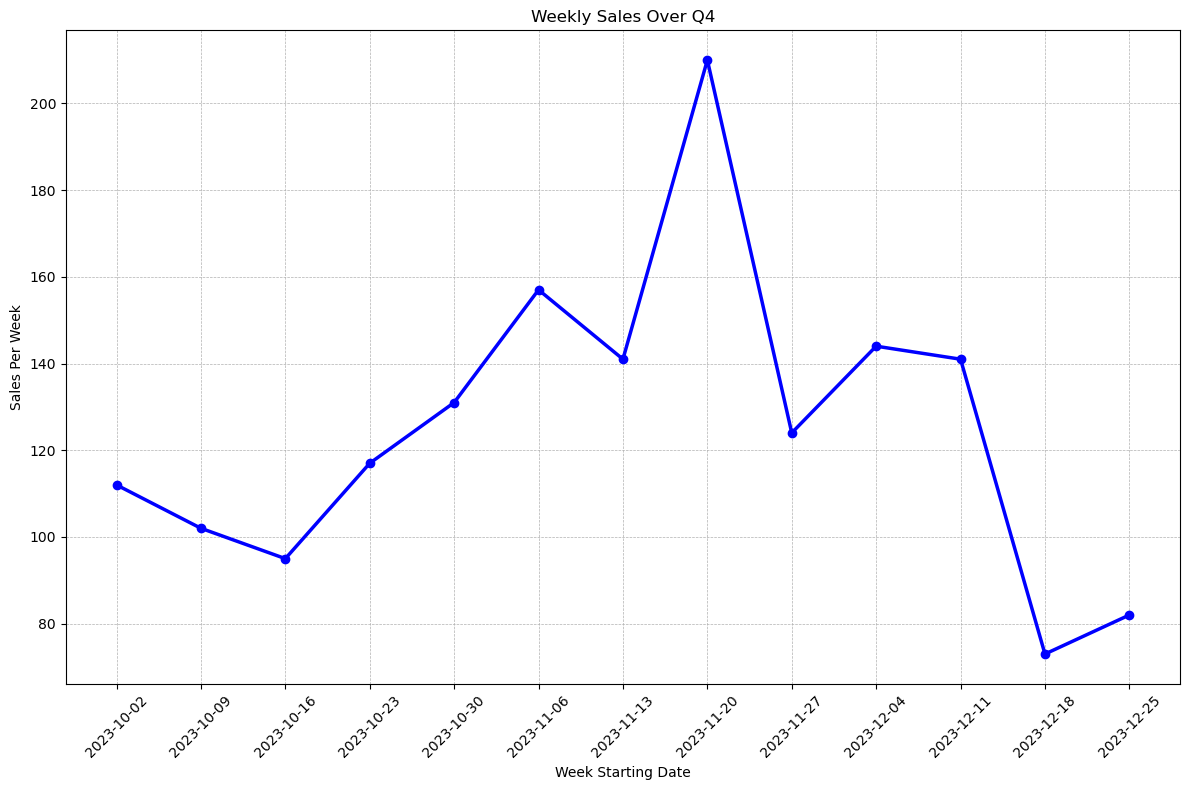

In [19]:
# Converting 'Sales Date' to datetime and grouping
data['Sales Date'] = pd.to_datetime(data['Sales Date'])
weekly_sales = data.resample('W', on='Sales Date').size()

# Resetting the index to make 'Sales Date' a column, now representing the end of each week
weekly_sales = weekly_sales.reset_index(name='Sales Count')

# Adjust the 'Sales Date' to show the start of the week instead of the end - Better for the visualization
weekly_sales['Week Start Date'] = weekly_sales['Sales Date'] - pd.Timedelta(days=6)

# Display the result
print(weekly_sales)

# Plotting the line chart with 'Week Start Date' as x-axis
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(weekly_sales['Week Start Date'], weekly_sales['Sales Count'], marker='o', linestyle='-', color='blue', linewidth=2.5)

# Formatting the dates on the x-axis to make them more readable
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))  # Making sure all weeks start on Monday
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formatting the date display

# Rotating date labels for better readability and adding title, grid and labels
plt.xticks(rotation=45)
ax.set_title('Weekly Sales Over Q4')
ax.set_xlabel('Week Starting Date')
ax.set_ylabel('Sales Per Week')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()  # Adjusting layout to make room for label rotation
plt.show()

#######################################################
# BEST AGENTS IN TERMS OF SALES AND GOOD INSTALLATION #
#######################################################

                 Total_Sales  Installed_Sales  Installation_Rate
Agent Name                                                      
Jesus Garcia             218              112          51.376147
Juan Munoz               151               67          44.370861
Junior Limon             137               80          58.394161
Mackenzie Perry          165               74          44.848485
                 Total_Sales  Installed_Sales  Installation_Rate
Agent Name                                                      
Jesus Garcia             218              112          51.376147
Mackenzie Perry          165               74          44.848485
Juan Munoz               151               67          44.370861
Junior Limon             137               80          58.394161


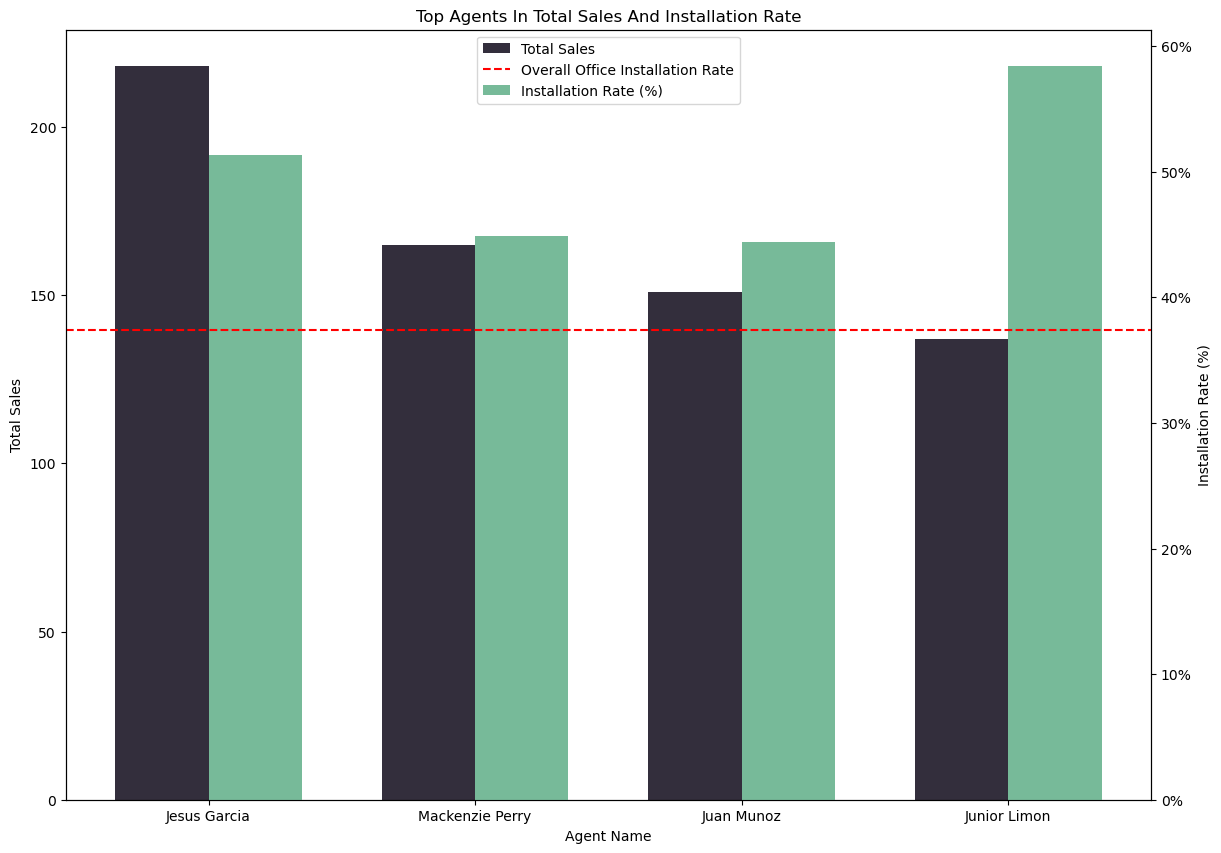

In [20]:
# For this I will get the best agents in terms of sales and installation rates using quantiles
# Filtering for relevant sales if specific conditions are needed and grouping by agent
data['Is Installed'] = data['Process Status'].str.contains('APPR on', na=False)

grouped = data.groupby('Agent Name').agg(
    Total_Sales=('Agent Name', 'size'),
    Installed_Sales=('Is Installed', 'sum')
)
grouped['Installation_Rate'] = (grouped['Installed_Sales'] / grouped['Total_Sales']) * 100

# Defining thresholds based on quantiles
# Decided to go for 0.75 in sales threshold but lower on the installation due to the results I wanted to display
# Getting the top 3 + 1 performing agents in sales volume and installation rates

sales_threshold = grouped['Total_Sales'].quantile(0.75)  # Adjust quantile as needed
rate_threshold = grouped['Installation_Rate'].quantile(0.5)  # Adjust quantile as needed

# Filtering for agents who meet both conditions and ordering them
top_agents = grouped[(grouped['Total_Sales'] >= sales_threshold) & (grouped['Installation_Rate'] >= rate_threshold)]
print(top_agents)

top_agents_sorted = top_agents.sort_values(by=['Total_Sales', 'Installed_Sales'], ascending=[False, False])
print(top_agents_sorted)

# Bar chart for total sales
fig, ax1 = plt.subplots(figsize=(14, 10))
# Defining the bar width and positions
bar_width = 0.35
index = np.arange(len(top_agents_sorted))
bars1 = ax1.bar(index, top_agents_sorted['Total_Sales'], bar_width, label='Total Sales', color='#332E3C')
ax1.set_xlabel('Agent Name')
ax1.set_ylabel('Total Sales')
ax1.tick_params(axis='y')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(top_agents_sorted.index, rotation=0)

# Creating a secondary axis for installation rates
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width, top_agents_sorted['Installation_Rate'], bar_width, label='Installation Rate (%)', color='#77BA99')
ax2.set_ylabel('Installation Rate (%)')

# Formatting the y-axis to show percentages
formatter = FuncFormatter(lambda y, _: f'{int(y)}%')
ax2.yaxis.set_major_formatter(formatter)

ax2.tick_params(axis='y')

# Adding a reference line for the overall installation rate
ax2.axhline(y=overall_installation_rate, color='red', linestyle='--', label='Overall Office Installation Rate')

# Adding legends, title and showing plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center')
plt.title('Top Agents In Total Sales And Installation Rate')
plt.show()